**Task 1: Basic Data Exploration**


1.Import necessary and essential libraries
Before any analysis, we need to import libraries like
pandas, numpy, matplotlib, and seaborn for data
manipulation and visualization, along with scikitlearn for machine learning.

In [2]:
# Importing essential libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
import sklearn  # For machine learning algorithms
import warnings  # To ignore warnings

# Ignore warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")


Libraries imported successfully!


In [3]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload the file

# Get the filename dynamically
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)


Saving HousePrediction.csv to HousePrediction (1).csv


2. Display all the columns of DataFrame
We will display all the columns of the dataset using
Pandas to get a better understanding of the data
structure.

In [ ]:
# Display all column names
print("Columns in the dataset:\n")
print(df.columns)


Columns in the dataset:

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


3. Read the data and display the first 100 rows
We'll read the dataset from a file (e.g., CSV) and
display the first 100 rows to get a quick overview of
the data.

In [ ]:
# Display the first 100 rows
df.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


4.Give column insights
For each column, we'll analyze what the data
represents, whether it's numerical, categorical, or
temporal, and its potential impact on the house
prices.

In [ ]:
# Separating categorical, numerical, and temporal columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Assuming temporal columns are related to years
temporal_cols = [col for col in numerical_cols if "Year" in col or "Date" in col]

print("Categorical Columns:\n", categorical_cols.tolist())
print("\nNumerical Columns:\n", numerical_cols.tolist())
print("\nTemporal Columns:\n", temporal_cols)


Categorical Columns:
 ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

Numerical Columns:
 ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']

Temporal Columns:
 ['YearBuilt', 'YearRemodAdd']


**Task 2: Data Cleaning and Analysis**


Q1) Checking for Missing Values
It's important to identify missing values in the dataset
because they can affect model performance. We'll use
functions like isnull() and sum() to check for missing
values in each column.

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]

print("Columns with missing values and their count:\n")
print(missing_values)


Columns with missing values and their count:

MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


Q2) Features with NAN Values
We will identify which columns contain missing values
and how many rows are affected. This will help us decide
whether to drop or impute these values.

In [ ]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display results
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Sort by percentage of missing values in descending order
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

# Display the results
print("Columns with missing values and their percentage:\n")
print(missing_df)


Columns with missing values and their percentage:

             Missing Values  Percentage
SalePrice              1459   49.982871
MSZoning                  4    0.137033
Exterior1st               1    0.034258
BsmtFinSF2                1    0.034258
TotalBsmtSF               1    0.034258


Q3) Calculate Mean Sales Price for Missing/Present
Information
For each feature with missing data, we will calculate the
mean sale price based on whether information is present
or missing to understand its impact.

In [ ]:
# List of columns with missing values
missing_cols = df.columns[df.isnull().sum() > 0]

# Dictionary to store mean sale prices
mean_sale_prices = {}

# Loop through each column with missing values
for col in missing_cols:
    mean_price_missing = df[df[col].isnull()]['SalePrice'].mean()  # Mean SalePrice when value is missing
    mean_price_present = df[df[col].notnull()]['SalePrice'].mean()  # Mean SalePrice when value is present

    mean_sale_prices[col] = {
        'Mean SalePrice (Missing)': mean_price_missing,
        'Mean SalePrice (Present)': mean_price_present
    }

# Convert to DataFrame for better visualization
mean_sale_prices_df = pd.DataFrame(mean_sale_prices).T

# Display the result
print("Mean SalePrice for Missing vs Present values in each column:\n")
print(mean_sale_prices_df)


Mean SalePrice for Missing vs Present values in each column:

             Mean SalePrice (Missing)  Mean SalePrice (Present)
MSZoning                          NaN              180921.19589
Exterior1st                       NaN              180921.19589
BsmtFinSF2                        NaN              180921.19589
TotalBsmtSF                       NaN              180921.19589
SalePrice                         NaN              180921.19589


Q4) Count of Numerical Features
We'll count the number of numerical columns in the
dataset, which are important for statistical analysis.


In [ ]:
# Select numerical columns (int64 and float64 data types)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Count the number of numerical columns
num_numerical_features = len(numerical_cols)

print(f"Total number of numerical features: {num_numerical_features}")
print("\nList of numerical features:\n", numerical_cols.tolist())


Total number of numerical features: 9

List of numerical features:
 ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


Q5) Print the First Five Rows of Numerical Values
Displaying the first five rows of numerical features will
help us understand the range and structure of the
numerical data.

In [ ]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=['int64', 'float64'])

# Display the first five rows
print("First five rows of numerical values:\n")
print(numerical_data.head())


First five rows of numerical values:

   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


Q6) Compare the Difference Between Year Features
and SalePrice
We will compare features like YearBuilt and
YearRemodAdd with the sale price to see how the age or
renovation of a house affects its value.


In [ ]:
# Compare mean SalePrice based on YearBuilt and YearRemodAdd
year_features = ['YearBuilt', 'YearRemodAdd']

for col in year_features:
    print(f"\nMean SalePrice grouped by {col}:\n")
    print(df.groupby(col)['SalePrice'].mean().head(10))  # Display first 10 years for reference



Mean SalePrice grouped by YearBuilt:

YearBuilt
1872    122000.00
1875     94000.00
1879          NaN
1880    200619.75
1882    168000.00
1885    111250.00
1890    142200.00
1892    291250.00
1893    325000.00
1895          NaN
Name: SalePrice, dtype: float64

Mean SalePrice grouped by YearRemodAdd:

YearRemodAdd
1950    117463.056180
1951    129975.000000
1952    110398.600000
1953    147640.000000
1954    121142.857143
1955    124511.111111
1956    124235.000000
1957    132656.444444
1958    128386.666667
1959    136054.555556
Name: SalePrice, dtype: float64


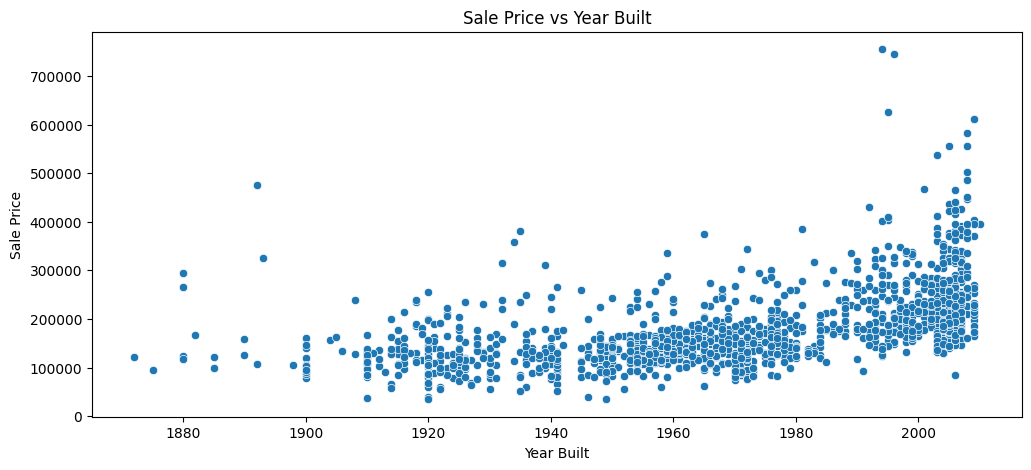

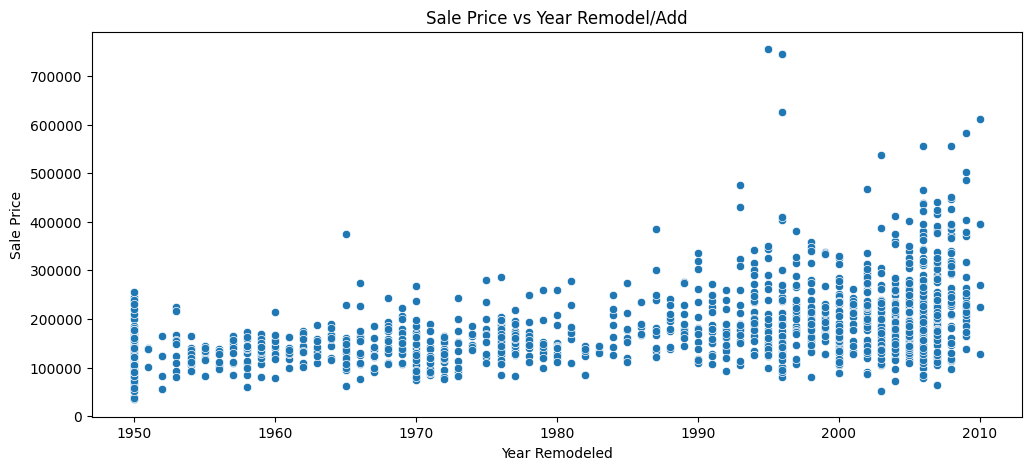

In [ ]:
# Plot YearBuilt vs SalePrice
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'])
plt.title("Sale Price vs Year Built")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

# Plot YearRemodAdd vs SalePrice
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['YearRemodAdd'], y=df['SalePrice'])
plt.title("Sale Price vs Year Remodel/Add")
plt.xlabel("Year Remodeled")
plt.ylabel("Sale Price")
plt.show()

Q7) Relationship Between Discrete Variables and
Sales Price
Discrete variables (e.g., OverallCond) will be analyzed to
see how they influence the sale price using statistical
techniques and visualizations.


Mean SalePrice grouped by OverallCond:

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64


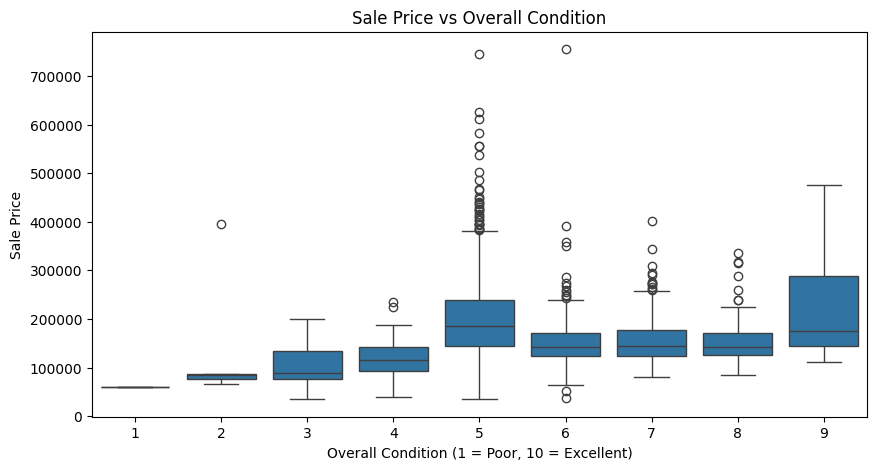

In [ ]:
# List of potential discrete variables
discrete_vars = ['OverallCond']

# Check SalePrice statistics for each discrete variable
for col in discrete_vars:
    print(f"\nMean SalePrice grouped by {col}:\n")
    print(df.groupby(col)['SalePrice'].mean())

# Plot Overall Condition vs Sale Price
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['OverallCond'], y=df['SalePrice'])
plt.title("Sale Price vs Overall Condition")
plt.xlabel("Overall Condition (1 = Poor, 10 = Excellent)")
plt.ylabel("Sale Price")
plt.show()


Q8) Relationship Between Continuous Variables and
Sales Price
We will analyze continuous variables like LotArea and
TotalBsmtSF to check their correlation with the sale
price.


Correlation of Continuous Variables with SalePrice:

SalePrice      1.000000
TotalBsmtSF    0.613581
LotArea        0.263843
Name: SalePrice, dtype: float64


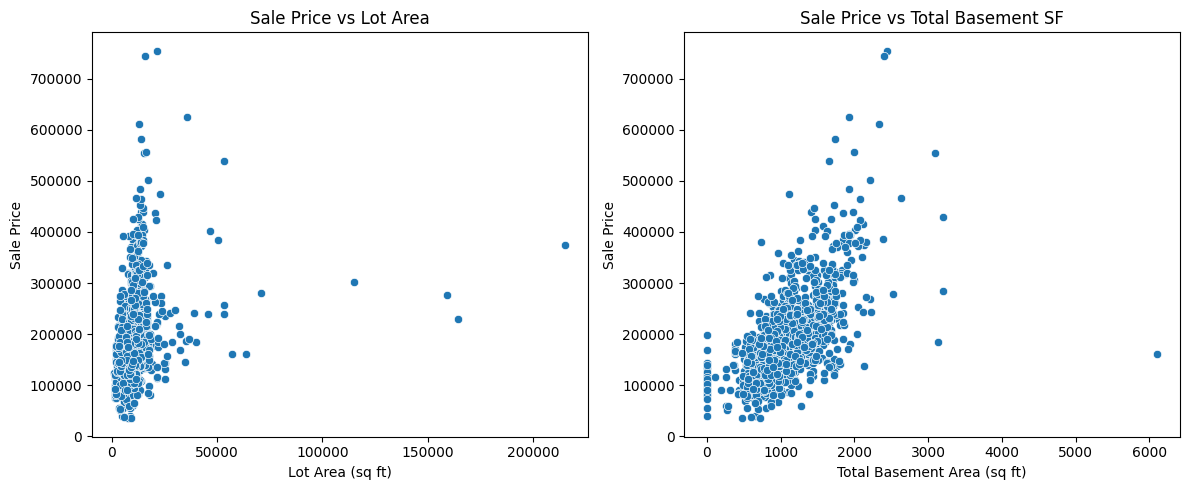

In [ ]:
# List of continuous variables
continuous_vars = ['LotArea', 'TotalBsmtSF']

# Compute correlation with SalePrice
correlation_values = df[continuous_vars + ['SalePrice']].corr()
print("\nCorrelation of Continuous Variables with SalePrice:\n")
print(correlation_values['SalePrice'].sort_values(ascending=False))

# Create scatter plots for each continuous variable vs. SalePrice
plt.figure(figsize=(12, 5))

# LotArea vs SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['LotArea'], y=df['SalePrice'])
plt.title("Sale Price vs Lot Area")
plt.xlabel("Lot Area (sq ft)")
plt.ylabel("Sale Price")

# TotalBsmtSF vs SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['TotalBsmtSF'], y=df['SalePrice'])
plt.title("Sale Price vs Total Basement SF")
plt.xlabel("Total Basement Area (sq ft)")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

Q9) Histogram Analysis for Continuous Variables
A histogram will be created for continuous variables to
visualize their distribution and see if any transformation
(like log transformation) is needed.

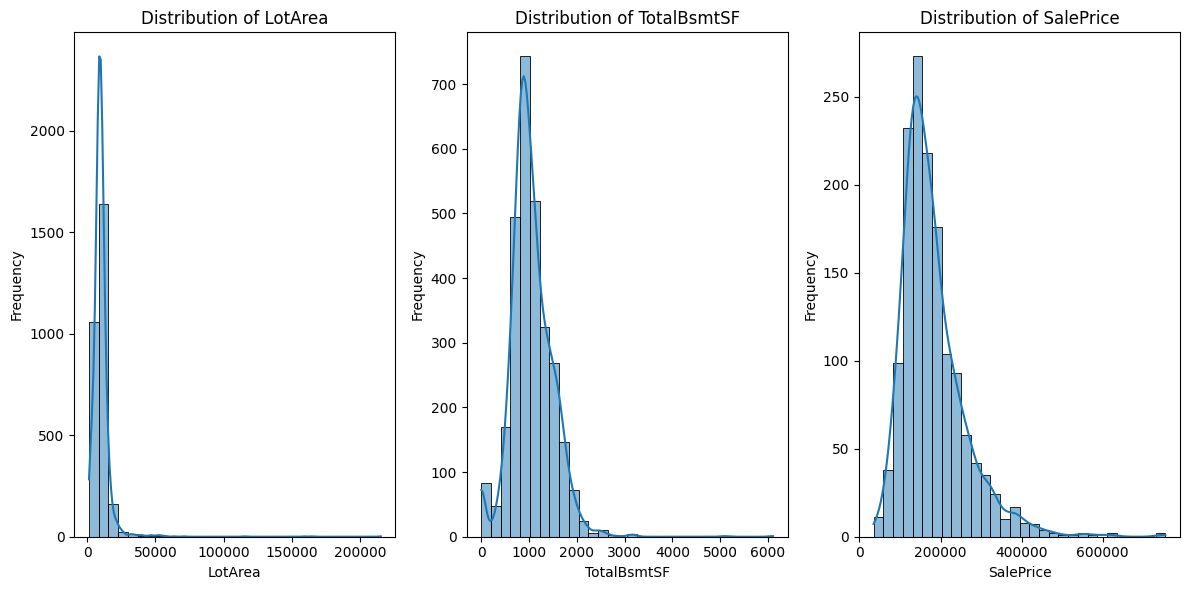


If skewness > 1, the data is highly skewed → Log transformation may help and If skewness ≈ 0, the data is normally distributed.

Skewness of Continuous Variables:

LotArea        12.829025
TotalBsmtSF     1.162882
SalePrice       1.882876
dtype: float64


In [ ]:
# List of continuous numerical variables
continuous_vars = ['LotArea', 'TotalBsmtSF', 'SalePrice']

# Plot histograms for each variable
plt.figure(figsize=(12, 6))

for i, col in enumerate(continuous_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Calculate skewness for continuous variables
skew_values = df[continuous_vars].skew()
print("\nIf skewness > 1, the data is highly skewed → Log transformation may help and If skewness ≈ 0, the data is normally distributed.")
print("\nSkewness of Continuous Variables:\n")
print(skew_values)

Q10) Logarithmic Transformation
Apply logarithmic transformation to skewed data to make
it more normally distributed and improve model
performance.

In [ ]:
# List of continuous numerical variables
continuous_vars = ['LotArea', 'TotalBsmtSF', 'SalePrice']

# Calculate skewness
skew_values = df[continuous_vars].skew()
print("\nSkewness before Log Transformation:\n")
print(skew_values)

# Select features with high skewness (typically > 1)
skewed_features = skew_values[skew_values > 1].index.tolist()
print("\nHighly skewed features:", skewed_features)


Skewness before Log Transformation:

LotArea        12.829025
TotalBsmtSF     1.162882
SalePrice       1.882876
dtype: float64

Highly skewed features: ['LotArea', 'TotalBsmtSF', 'SalePrice']


In [ ]:
# Apply log transformation
df_transformed = df.copy()
for col in skewed_features:
    df_transformed[col] = np.log1p(df[col])

print("\nLog transformation applied to:", skewed_features)



Log transformation applied to: ['LotArea', 'TotalBsmtSF', 'SalePrice']


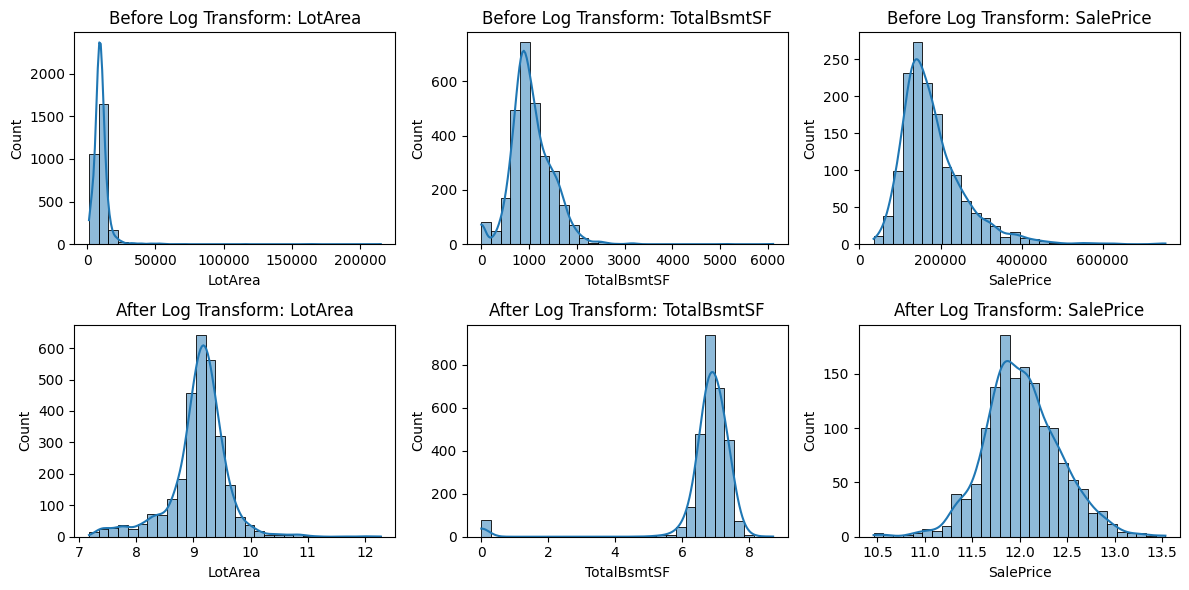

In [ ]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(skewed_features, 1):
    plt.subplot(2, len(skewed_features), i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Before Log Transform: {col}")

    plt.subplot(2, len(skewed_features), i + len(skewed_features))
    sns.histplot(df_transformed[col], bins=30, kde=True)
    plt.title(f"After Log Transform: {col}")

plt.tight_layout()
plt.show()

**Task 3: Feature Engineering and Advanced Analysis**


Q1) Find Outliers
We will use methods like boxplots and statistical
techniques to detect outliers, which can skew predictions
and need to be handled carefully.

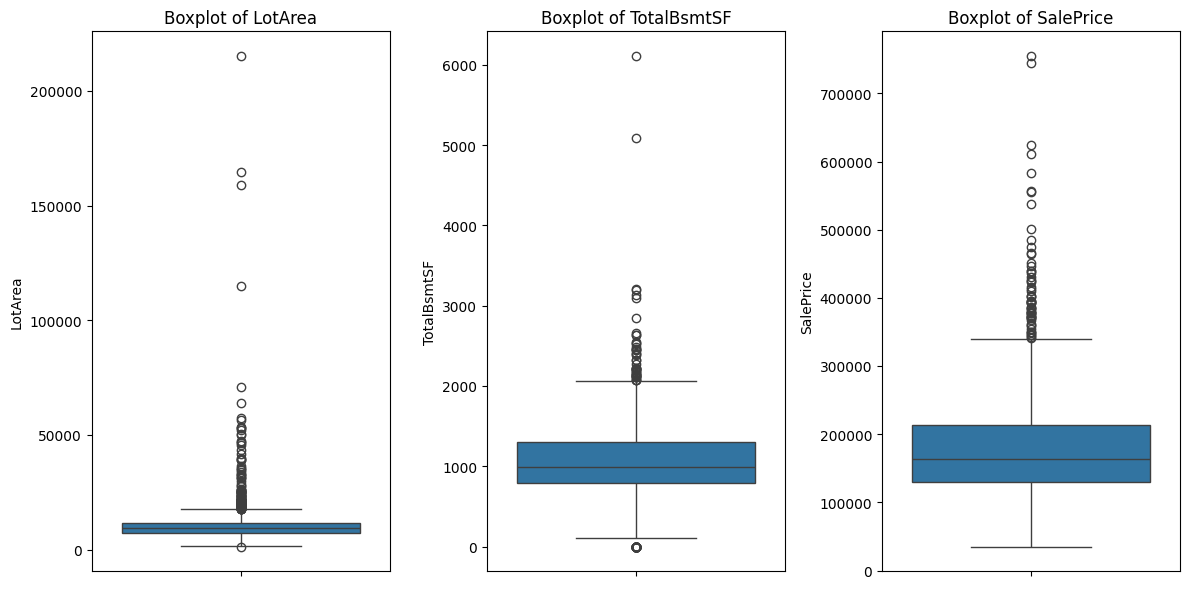

In [ ]:
# List of continuous numerical variables to check for outliers
continuous_vars = ['LotArea', 'TotalBsmtSF', 'SalePrice']

plt.figure(figsize=(12, 6))

for i, col in enumerate(continuous_vars, 1):
    plt.subplot(1, len(continuous_vars), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

# Check outliers for selected continuous variables
for col in continuous_vars:
    detect_outliers_iqr(df, col)


LotArea: 128 outliers detected
TotalBsmtSF: 122 outliers detected
SalePrice: 61 outliers detected


Q2) Relationship Between Categorical Features and
SalePrice
We will explore how categorical features like MSZoning
and BldgType impact the sale price, using group-by
operations and visualizations.


In [ ]:
# List of categorical variables to analyze
categorical_vars = ['MSZoning', 'BldgType']

# Display mean SalePrice for each category
for col in categorical_vars:
    print(f"\nAverage SalePrice grouped by {col}:\n")
    print(df.groupby(col)['SalePrice'].mean())



Average SalePrice grouped by MSZoning:

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

Average SalePrice grouped by BldgType:

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64


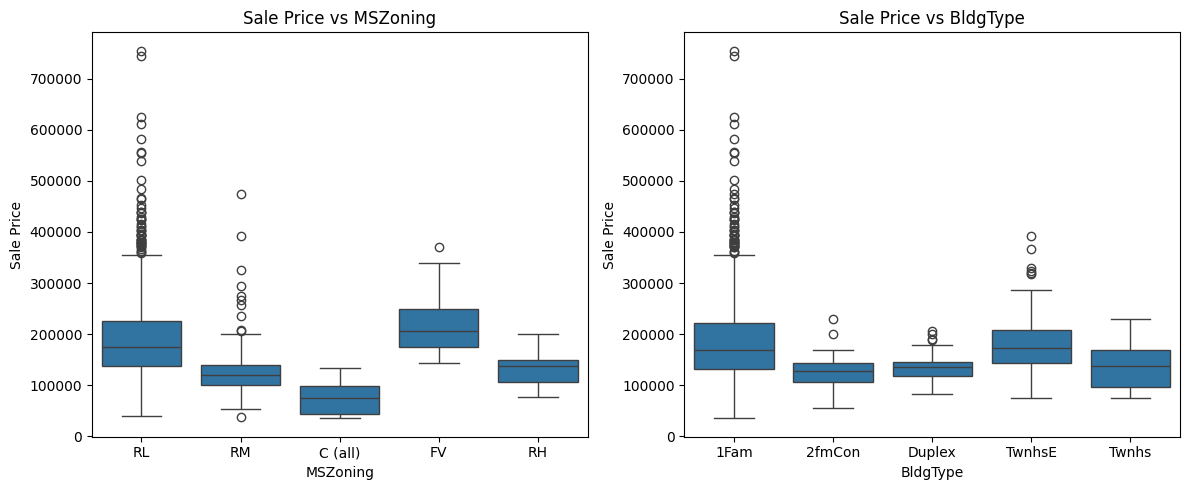

In [ ]:
plt.figure(figsize=(12, 5))

for i, col in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.title(f"Sale Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

Q3) Correlation Between Numerical Features and
SalePrice
Correlation analysis (like Pearson correlation) will be
used to identify which numerical features have the
strongest correlation with the sale price.

In [ ]:
# Select only numerical features
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation of numerical features with SalePrice
correlation = numerical_df.corr()

# Sort correlation values with SalePrice
correlation_with_saleprice = correlation['SalePrice'].sort_values(ascending=False)

# Display the top correlated features
print("\nTop Numerical Features Correlated with SalePrice:\n")
print(correlation_with_saleprice)



Top Numerical Features Correlated with SalePrice:

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


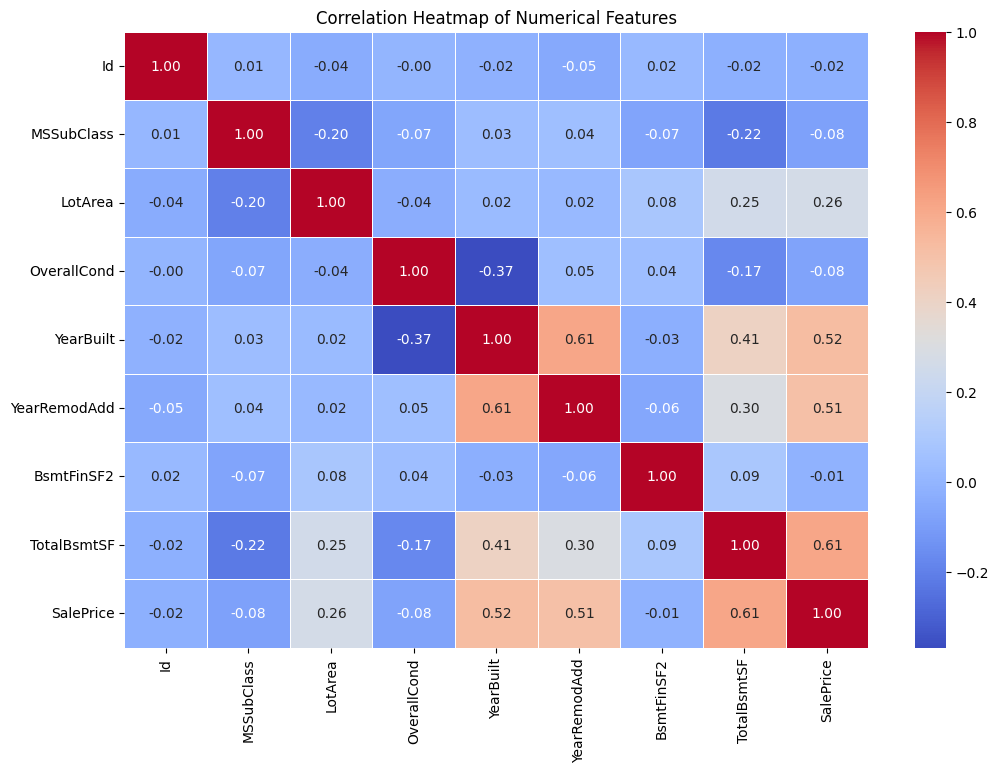

In [ ]:
# Set figure size
plt.figure(figsize=(12, 8))

# Create a heatmap of only numerical correlations
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# Selecting features highly correlated with SalePrice (Threshold: > 0.5)
highly_correlated_features = correlation_with_saleprice[correlation_with_saleprice > 0.5]
print("\nHighly Correlated Features (Correlation > 0.5):\n")
print(highly_correlated_features)



Highly Correlated Features (Correlation > 0.5):

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Q4) Continuous Features vs. SalePrice
We will examine continuous variables' impact on house
prices using scatter plots and correlation matrices.

In [4]:
# Selecting only numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing 'Id' and 'SalePrice' since 'Id' is just an identifier
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')

print("Continuous Numerical Features:\n", numerical_cols)


Continuous Numerical Features:
 ['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']


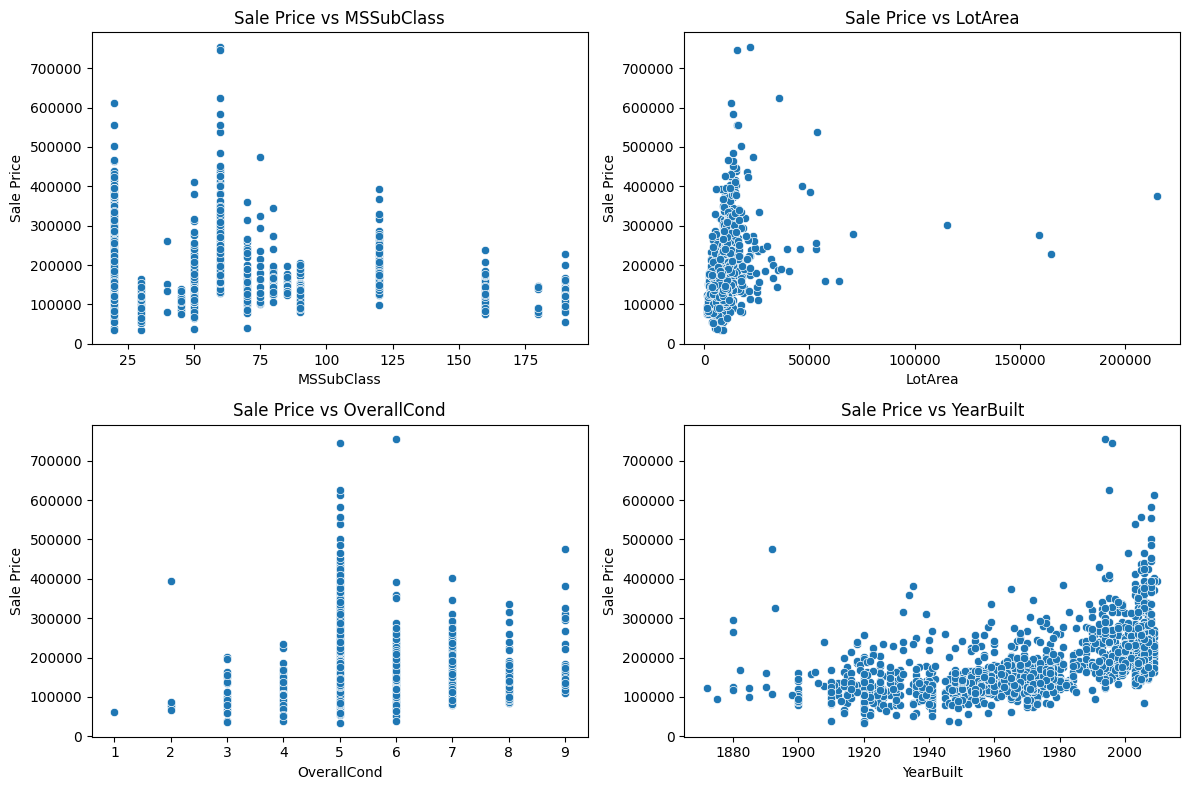

In [5]:
# Plot scatter plots for selected continuous variables
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols[:4], 1):  # Limit to first 4 features for readability
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f"Sale Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

In [6]:
# Compute correlation of continuous features with SalePrice
correlation = df[numerical_cols + ['SalePrice']].corr()

# Display correlation values with SalePrice
correlation_with_saleprice = correlation['SalePrice'].sort_values(ascending=False)
print("\nCorrelation of Continuous Features with SalePrice:\n")
print(correlation_with_saleprice)



Correlation of Continuous Features with SalePrice:

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


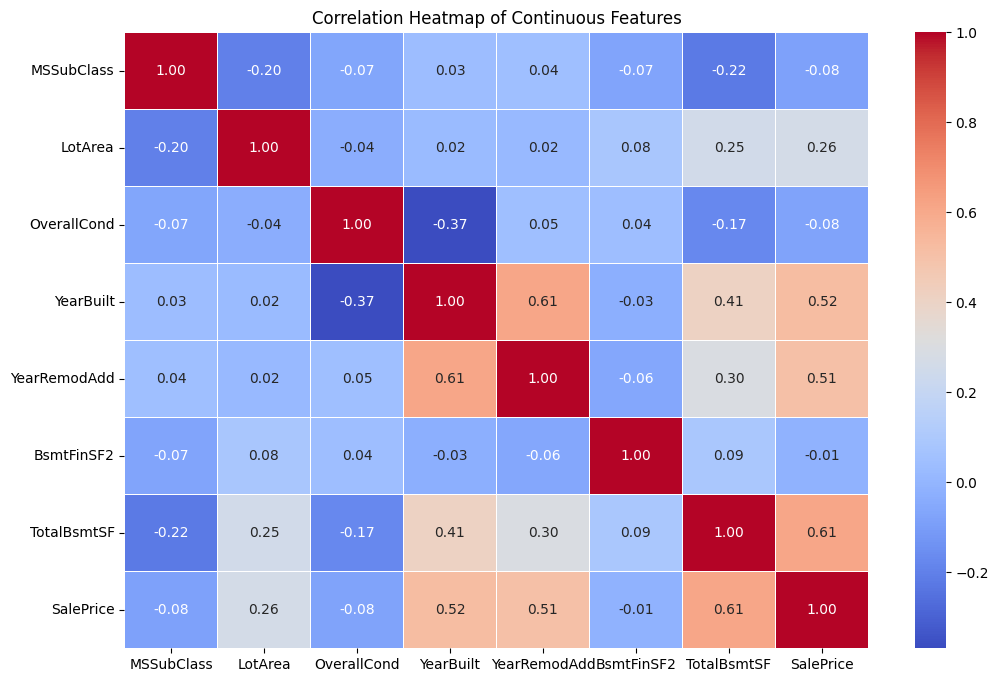

In [7]:
plt.figure(figsize=(12, 8))

# Create a heatmap for continuous feature correlations
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Continuous Features")
plt.show()


**Q5) Feature Engineering**


 * Handle Missing Values: Techniques like
mean/mode imputation or using predictive models to
fill in missing data.

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values

# Display columns with missing values
print("Columns with missing values and their count:\n")
print(missing_values)


Columns with missing values and their count:

MSZoning          4
Exterior1st       1
BsmtFinSF2        1
TotalBsmtSF       1
SalePrice      1459
dtype: int64


In [10]:
# Identify numerical and categorical columns separately
num_cols_with_nan = df.select_dtypes(include=['int64', 'float64']).columns[df.select_dtypes(include=['int64', 'float64']).isnull().sum() > 0]
cat_cols_with_nan = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().sum() > 0]

# Handling missing values for numerical columns using mean imputation
for col in num_cols_with_nan:
    df[col].fillna(df[col].mean(), inplace=True)

# Handling missing values for categorical columns using mode imputation
for col in cat_cols_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


In [11]:
# Check if missing values still exist
print("Missing values after handling:\n")
print(df.isnull().sum().sum())  # Should return 0 if all missing values are filled


Missing values after handling:

0


* Handle Categorical Variables: Convert categorical
variables into numerical ones using techniques like
One-Hot Encoding or Label Encoding.

In [12]:
# Selecting categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns:\n", categorical_cols)


Categorical Columns:
 ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to categorical columns
df_label_encoded = df.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for future use

print("Categorical variables encoded using Label Encoding!")
print(df_label_encoded.head())


Categorical variables encoded using Label Encoding!
   Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0   0          60         3     8450          4         0            5   
1   1          20         3     9600          2         0            8   
2   2          60         3    11250          4         0            5   
3   3          70         3     9550          0         0            5   
4   4          60         3    14260          2         0            5   

   YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003           12         0.0        856.0   208500.0  
1       1976          1976            8         0.0       1262.0   181500.0  
2       2001          2002           12         0.0        920.0   223500.0  
3       1915          1970           13         0.0        756.0   140000.0  
4       2000          2000           12         0.0       1145.0   250000.0  


* Handle Numerical Variables: Scale or transform
numerical variables to ensure that they fit the model's
assumptions.

In [18]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical variables encoded successfully!")
print("Dataset shape after encoding:", df_encoded.shape)


Categorical variables encoded successfully!
Dataset shape after encoding: (2919, 35)


In [19]:
# Selecting only numerical features (excluding target variable 'SalePrice')
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')  # Remove target variable

print("Numerical Columns:\n", numerical_cols)


Numerical Columns:
 ['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF']


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply Standardization
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Numerical variables scaled using StandardScaler!")
print(df_scaled.head())


Numerical variables scaled using StandardScaler!
         Id  MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0 -1.731458    0.067331 -0.217879    -0.507284   1.046258      0.896833   
1 -1.730271   -0.873616 -0.072044     2.188279   0.154764     -0.395604   
2 -1.729084    0.067331  0.137197    -0.507284   0.980221      0.848965   
3 -1.727897    0.302568 -0.078385    -0.507284  -1.859351     -0.682812   
4 -1.726711    0.067331  0.518903    -0.507284   0.947203      0.753229   

   BsmtFinSF2  TotalBsmtSF  SalePrice  MSZoning_FV  ...  Exterior1st_CemntBd  \
0    -0.29313    -0.444328   208500.0        False  ...                False   
1    -0.29313     0.477111   181500.0        False  ...                False   
2    -0.29313    -0.299076   223500.0        False  ...                False   
3    -0.29313    -0.671283   140000.0        False  ...                False   
4    -0.29313     0.211573   250000.0        False  ...                False   

   Exterior1st_HdBo

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Normalization
df_normalized = df_encoded.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Numerical variables normalized using MinMaxScaler!")
print(df_normalized.head())


Numerical variables normalized using MinMaxScaler!
         Id  MSSubClass   LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0  0.000000    0.235294  0.033420        0.500   0.949275      0.883333   
1  0.000343    0.000000  0.038795        0.875   0.753623      0.433333   
2  0.000685    0.235294  0.046507        0.500   0.934783      0.866667   
3  0.001028    0.294118  0.038561        0.500   0.311594      0.333333   
4  0.001371    0.235294  0.060576        0.500   0.927536      0.833333   

   BsmtFinSF2  TotalBsmtSF  SalePrice  MSZoning_FV  ...  Exterior1st_CemntBd  \
0         0.0     0.140098   208500.0        False  ...                False   
1         0.0     0.206547   181500.0        False  ...                False   
2         0.0     0.150573   223500.0        False  ...                False   
3         0.0     0.123732   140000.0        False  ...                False   
4         0.0     0.187398   250000.0        False  ...                False   

   Exterior1st_Hd

In [22]:
# Identify skewed features (skewness > 1)
skewed_features = df_encoded[numerical_cols].skew()
highly_skewed = skewed_features[skewed_features > 1].index.tolist()

print("Highly Skewed Features Before Transformation:\n", highly_skewed)

# Apply log transformation
df_log_transformed = df_encoded.copy()
for col in highly_skewed:
    df_log_transformed[col] = np.log1p(df_encoded[col])  # log1p handles zero values

print("Log transformation applied to skewed numerical features!")


Highly Skewed Features Before Transformation:
 ['MSSubClass', 'LotArea', 'BsmtFinSF2', 'TotalBsmtSF']
Log transformation applied to skewed numerical features!


* Handling Temporal Variables: Extract relevant
information from temporal features like age of the
house (e.g., difference between YearBuilt and the
current year).

In [23]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Create new features for house age and renovation age
df_encoded['HouseAge'] = current_year - df_encoded['YearBuilt']
df_encoded['SinceLastRenovation'] = current_year - df_encoded['YearRemodAdd']

# Display the new features
print(df_encoded[['YearBuilt', 'HouseAge', 'YearRemodAdd', 'SinceLastRenovation']].head())


   YearBuilt  HouseAge  YearRemodAdd  SinceLastRenovation
0       2003        22          2003                   22
1       1976        49          1976                   49
2       2001        24          2002                   23
3       1915       110          1970                   55
4       2000        25          2000                   25


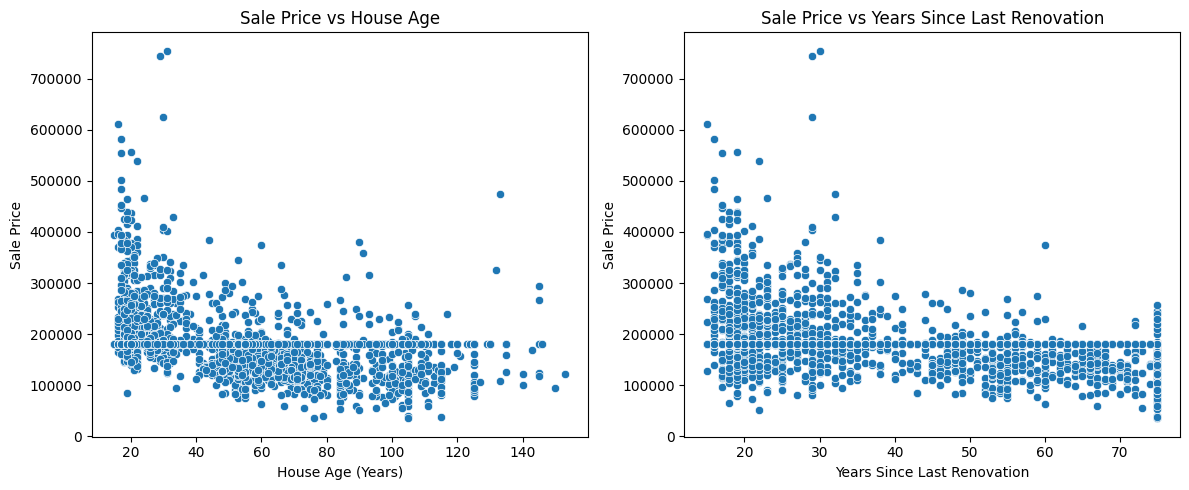

In [27]:
plt.figure(figsize=(12, 5))

# House Age vs Sale Price
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_encoded['HouseAge'], y=df_encoded['SalePrice'])
plt.title("Sale Price vs House Age")
plt.xlabel("House Age (Years)")
plt.ylabel("Sale Price")

# Since Last Renovation vs Sale Price
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_encoded['SinceLastRenovation'], y=df_encoded['SalePrice'])
plt.title("Sale Price vs Years Since Last Renovation")
plt.xlabel("Years Since Last Renovation")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

**Advanced Questions for the Project:**


Q11: How does the location (based on zoning and lot
configuration) influence the house price?


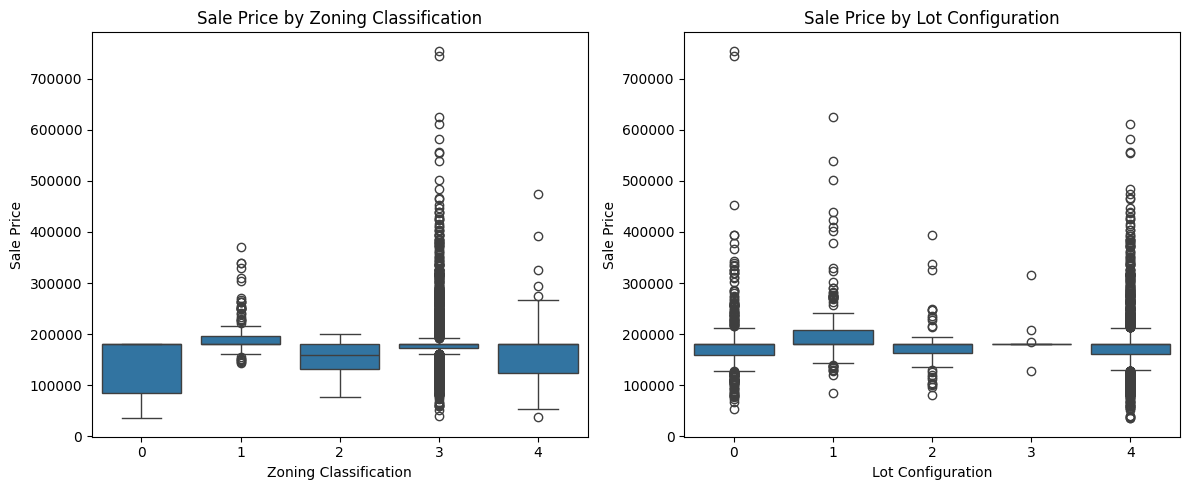


Average SalePrice by Zoning Classification:
 MSZoning
0    138363.917534
1    196396.276949
2    150544.075342
3    186036.423978
4    155043.474795
Name: SalePrice, dtype: float64

Average SalePrice by Lot Configuration:
 LotConfig
0    181282.617575
1    203851.545813
2    179269.769927
3    188793.711350
4    178956.698902
Name: SalePrice, dtype: float64


In [35]:
#Analyzing how location (MSZoning and LotConfig) influences SalePrice
plt.figure(figsize=(12, 5))

# MSZoning vs SalePrice
plt.subplot(1, 2, 1)
sns.boxplot(x=df_encoded['MSZoning'], y=df_encoded['SalePrice'])
plt.title("Sale Price by Zoning Classification")
plt.xlabel("Zoning Classification")
plt.ylabel("Sale Price")

# LotConfig vs SalePrice
plt.subplot(1, 2, 2)
sns.boxplot(x=df_encoded['LotConfig'], y=df_encoded['SalePrice'])
plt.title("Sale Price by Lot Configuration")
plt.xlabel("Lot Configuration")
plt.ylabel("Sale Price")

plt.tight_layout()
plt.show()

# Display average SalePrice for each category
grouped_zoning = df_encoded.groupby('MSZoning')['SalePrice'].mean()
grouped_lotconfig = df_encoded.groupby('LotConfig')['SalePrice'].mean()

print("\nAverage SalePrice by Zoning Classification:\n", grouped_zoning)
print("\nAverage SalePrice by Lot Configuration:\n", grouped_lotconfig)

Q12: What is the impact of the overall condition of
the house on the sale price?


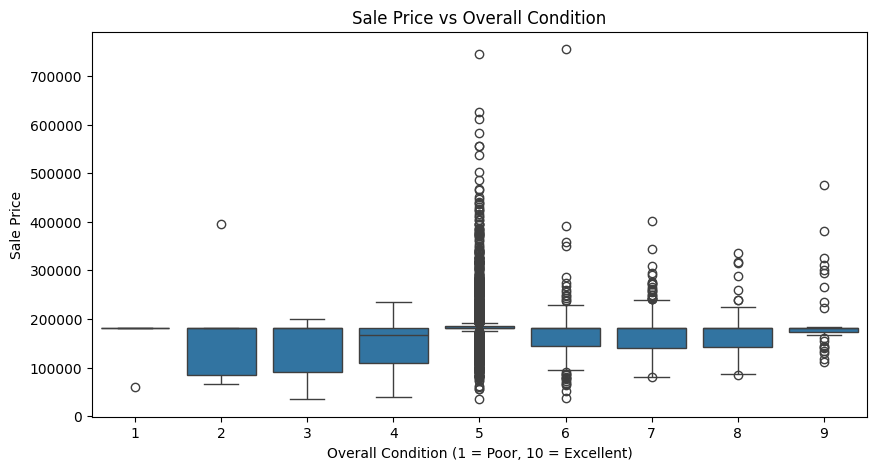


Average SalePrice by Overall Condition:
 OverallCond
1    163789.596477
2    161453.797945
3    141425.297945
4    146787.362566
5    192013.788701
6    168126.807257
7    168949.349333
8    168286.466001
9    199746.407852
Name: SalePrice, dtype: float64


In [36]:
# Analyzing impact of Overall Condition on SalePrice

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_encoded['OverallCond'], y=df_encoded['SalePrice'])
plt.title("Sale Price vs Overall Condition")
plt.xlabel("Overall Condition (1 = Poor, 10 = Excellent)")
plt.ylabel("Sale Price")
plt.show()

# Display average SalePrice for each Overall Condition
grouped_condition = df_encoded.groupby('OverallCond')['SalePrice'].mean()
print("\nAverage SalePrice by Overall Condition:\n", grouped_condition)

Q13: Does the presence of a basement (based on
TotalBsmtSF) significantly affect the house price?


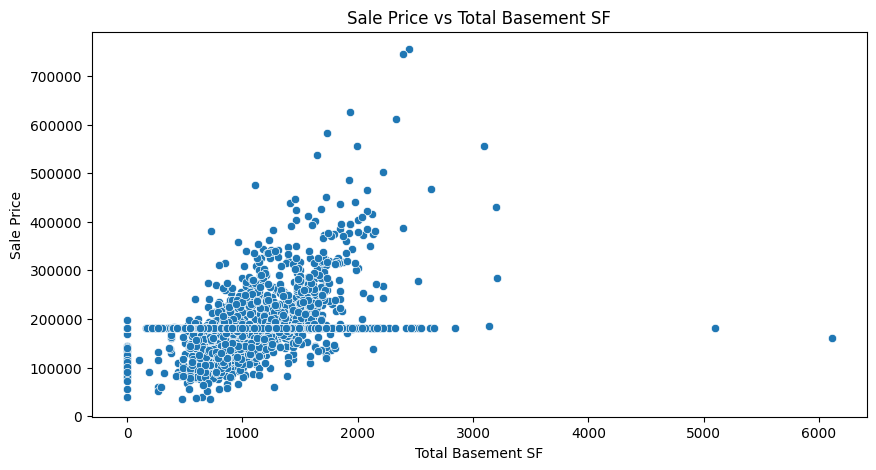


Correlation between TotalBsmtSF and SalePrice:
              TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.431912
SalePrice       0.431912   1.000000


In [37]:
#Analyzing impact of Total Basement SF on SalePrice

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_encoded['TotalBsmtSF'], y=df_encoded['SalePrice'])
plt.title("Sale Price vs Total Basement SF")
plt.xlabel("Total Basement SF")
plt.ylabel("Sale Price")
plt.show()

# Display correlation between TotalBsmtSF and SalePrice
corr_bsmt = df_encoded[['TotalBsmtSF', 'SalePrice']].corr()
print("\nCorrelation between TotalBsmtSF and SalePrice:\n", corr_bsmt)

Q14: How do remodeling and renovations
(YearRemodAdd) influence the property’s value over
time?

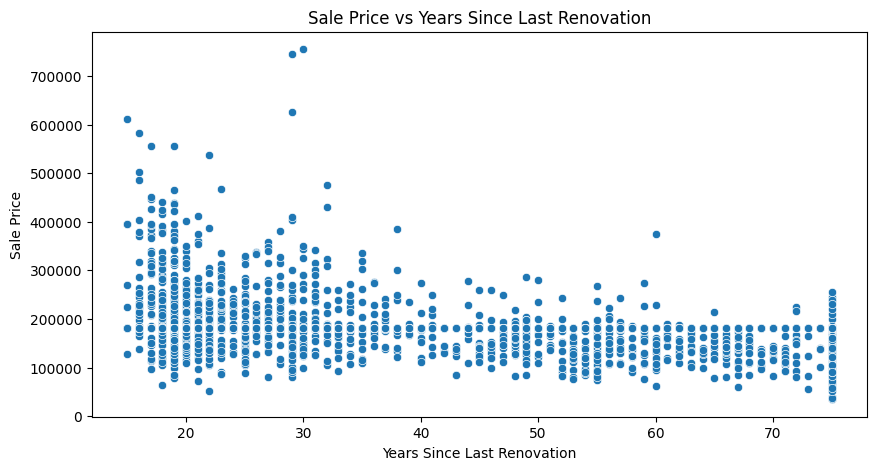


Correlation between Years Since Last Renovation and SalePrice:
                      SinceLastRenovation  SalePrice
SinceLastRenovation             1.000000  -0.354302
SalePrice                      -0.354302   1.000000


In [42]:
#Analyzing impact of Renovation (YearRemodAdd) on SalePrice

plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_encoded['SinceLastRenovation'], y=df_encoded['SalePrice'])
plt.title("Sale Price vs Years Since Last Renovation")
plt.xlabel("Years Since Last Renovation")
plt.ylabel("Sale Price")
plt.show()

# Display correlation between SinceLastRenovation and SalePrice
corr_renov = df_encoded[['SinceLastRenovation', 'SalePrice']].corr()
print("\nCorrelation between Years Since Last Renovation and SalePrice:\n", corr_renov)

Q15: Can we predict house prices using just
categorical features (like building type, exterior
material) without numerical features?

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score

#Predicting house prices using only categorical features

categorical_features = df_encoded.select_dtypes(include=['object']).columns.tolist()

# One-hot encoding categorical features
df_categorical = pd.get_dummies(df_encoded, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = df_categorical.drop(columns=['SalePrice'])
y = df_categorical['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error:", mae)
print("R-squared Score:", r2)


Mean Absolute Error: 32644.84768357517
R-squared Score: 0.3359158621804723
